# Timeline of NLP

## Symbolic NLP (1950s - 1990s)

There are two main dates during this period.  

In 1950 **[IBM created the first model capable of translating](https://en.wikipedia.org/wiki/Georgetown%E2%80%93IBM_experiment)** 60 sentences from Russian into English. This was the first approach to machine translation. Unfortunately, the algorithm was only able to translate these 60 sentences! As soon as an unknown sentence was presented to the model, it was no longer able to translate it.

**[Eliza](https://en.wikipedia.org/wiki/ELIZA)** is a computer program written by Joseph Weizenbaum between 1964 and 1966, which simulates a psychotherapist by reformulating most of the "patient's" assertions into questions and asking them. Although Eliza is considered the first chatbot, this model had no level of comprehension, it really just rephrased the questions.

Throughout this period, a rules-based symbolic approach was used. Rules-Based uses Linguistic rules and patterns. *E.g English has the structure of SVO (Subject Verb Object), Hindi has SOV (Subject Object Verb)*.  This has been made possible by regular expressions and [context-free grammar](https://en.wikipedia.org/wiki/Context-free_grammar).



![](http://wiki.penson.io/images/cfg.png)

[source](http://wiki.penson.io/images/cfg.png)

The code could look like the part below, for a translation from English to Hindi.

```
"have" :=

if 
  subject(animate)
  and object(owned-by-subject)
then 
  translate to "Kade... aahe"
if 
  subject(animate)
  and object(kinship-with-subject)
then
  translate to "laa... aahe"
if 
  subject(inanimate)
then 
  translate to "madhye... aahe"

```

But this approach has limits. Not only does one have to be an expert in linguistics, but one also has to create a considerable number of rules for moderate effectiveness. 

| Advantages | Disadvantages|
|------------|--------------|
|No training time.|  Impossible to write all the rules because of the complexity of the languages. |
| Quick to execute. | Impossibility to process unknown data. |
| Efficient if the inputs are all known. |

**Exercise :** Explain using your own words (no copy and paste) what a symbolic approach is.

## Statistical NLP (1990s - 2010s)

The idea of the statistical approach is of course to find a model that can make generalities about unknown sentences rather than coding a whole bunch of rules that would be "hardcoded". 
 
The idea is based on a parallel corpus. It is given as input a sentence in English for example, and the model gives as output the translated sentence. 

We first tried to do word by word, it didn't work very well, because of the grammatical complexity of some languages. Then we created what we call n-grams. These are groups of words, unigram for one word, bigram for two words, trigram for three words and so on... So instead of doing word by word translations, we do them by groups of words. 



![](https://i.stack.imgur.com/8ARA1.png)

[source](https://stackoverflow.com/questions/18193253/what-exactly-is-an-n-gram)

During this period, there are 2 models that stand out for NLP : 

- [Logistic regression](https://en.wikipedia.org/wiki/Support-vector_machine)
- [SVM](https://en.wikipedia.org/wiki/Support-vector_machine)




**Exercise :** Load a *sentiment analysis* dataset and create a logistic regression model for classification. (1= positive , 0 =negative). For example, you could use the `twitter_samples` dataset from the `nltk` library.

* Tips : Use `CountVectorizer()` and `LogisticRegression()` from sklearn

In [ ]:
# MAX 10 LINES

In [1]:
# importing some required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yurit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\yurit\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

# Prepare the Data   
  The twitter_samples contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets. 

In [3]:
from nltk.corpus import twitter_samples
twitter_samples.fileids()

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# convert to DataFrame
df1 = pd.DataFrame (tweets, columns = ['tweet'])

In [4]:
import numpy as np
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
df2 = pd.DataFrame(labels)  # convert to DataFrame

In [5]:
# concatenate 
df = pd.concat([df1, df2], axis=1, join='inner')
df.rename(columns = {0:'sentiment'}, inplace = True)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

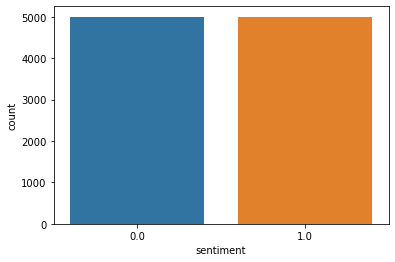

In [6]:
import seaborn as sns
# plotting the data using countplot
sns.countplot(x="sentiment",data=df)

# Data Pre-Processing:

In [7]:
def tweets_cleaner(tweet):
    # removing the urls from the text
    tweet = re.sub(r'((www.\S+)|(https?://\S+))', r"", tweet)
    #removing the numbers from the text
    tweet = re.sub(r'[0-9]\S+', r'', tweet)
    #removing the tags from the text
    tweet = re.sub(r'(@\S+) | (#\S+)', r'', tweet)
    # removing the punctuation from the text
    tweet_without_punctuation = [char for char in tweet if char not   
                                in string.punctuation]
    # converting the list to string 
    tweet_without_punctuation = "".join(tweet_without_punctuation) 
    # set of stop words 
    stop_words = set(stopwords.words("english"))
    # removing the stop words 
    tweet_without_stopwords = [word for word in  
                              tweet_without_punctuation.split()
                              if word.lower() not in stop_words]
    return tweet_without_stopwords

In [8]:
# Separating input feature and label
X=df.tweet
y=df.sentiment

## Get the wordcloud of the positive tweets

In [ ]:
data_pos = df['tweet'][:5000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(map(str, data_pos)))
plt.imshow(wc)

## Get the wordcloud of the negative tweets.

In [ ]:
data_neg = df['tweet'][5001:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(map(str, data_neg)))
plt.imshow(wc)

## Splitting our data into Train and Test Subset

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =0)

## Appliyng Countvectorizer:

In [9]:
# extract the features using count vectorizer
vectorizer = CountVectorizer(analyzer = tweets_cleaner, dtype =     
                            'uint8')
df_countvectorizer = vectorizer.fit_transform(df['tweet'])
df_countvectorizer.shape


(10000, 14028)

CountVectorizer vs 

In [ ]:
print(type(df_countvectorizer))

# Splitting Features:

In [10]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(  
                                                df_countvectorizer,  
                                                df["sentiment"],   
                                                test_size=0.2,  
                                                 random_state=0)


# Model Training and Testing:

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_class = model.predict(X_test)


In [12]:
accuracy_score(y_test, y_pred_class)

0.7605

In [13]:
# model accuracy
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77      1012
         1.0       0.78      0.72      0.75       988

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



OK, it works well! As you can see, the computer needs to translate the words into a vector to understand a sentence. But it's not that simple. In fact, for a computer, it is a very complex task. Indeed, the problem is quite simple.

When you teach a model to recognize a cat, for example, the model actually learns to create a vector which is a universal representation of the cat. This is possible if you show him enough examples of cats !

But for language, it is more complicated!

There are so many ways to express oneself, so many subtleties in our languages, that it becomes very difficult for a computer to really understand the deep meaning of a sentence.

Let's look at this sentence :

<center><b>I do not recommend this product which is bad.</b></center>
and : 
<center><b>I do recommend this product which is not bad.</b></center>  


These two sentences contain the same words, but their meanings are different.

The machine learning model will not be able to tell the difference between these two sentences.  With this model we lose an important piece of information, which is temporal information. Indeed, here, the order of the words has no effect on the prediction made by the model. However, as we have seen, this information can change the deep meaning of the sentence. 

Another problem, if we have a very large dataset, the computation time for training the model could be very long.

For these reasons, we have started to study possible alternatives. 


| Advantages | Disadvantages|
|------------|--------------|
| Can make a probalility when it receives an unknown input.|  The calculation time is long.  |
| Allows to make generalities in order to avoid coding rules. | Loss of information (Word order)  |
| | No context |

## Neural NLP (2010s - present)

### Word2Vec  (2010 - 2014)

Word2Vec is a module released in the 2010's. It's one of the first to use neural networks to make word representations. It's based on 2 architectures, CBOW and Skip-Gram. In both cases, they are 2-layer neural networks.

CBOW uses surrounding words to predict who is in the middle. Skip-gram is used to understand the context of the sentence. It thus makes it possible, among other things, to make classification. 

![word2vec](https://miro.medium.com/max/2400/1*cuOmGT7NevP9oJFJfVpRKA.png)

But we still have a problem. Certainly the model formation will be faster and more efficient, but we still don't have time information. He can recognize that the word "apple" is close to the word "pear". That's good enough! But the word order is still not taken into account in our model. He won't be able to differentiate the 2 sentences.

<center><b>I do not recommend this product which is bad.</b></center>
and : 
<center><b>I do recommend this product which is not bad.</b></center>  

To try to bring a solution to this problem, we tried to work with recurrent neural networks. 

| Advantages | Disadvantages|
|------------|--------------|
| Can output a probability when it receives an unknown input.|  The calculation time is long.  |
| Allows to make generalities in order to avoid coding rules. | Loss of information (Word order)  |
| Can know the similarity between two words. (ex: 'Car, Motorcycle') | |






**Exercise :** Explain using your own words (no copy and paste) what a skip-gram is.


### Recursive Neural Networks: RNN/LSTM (2014 - 2017)

Recursive neural networks are similar to "classical" neural networks, but they differ from them in that they use feedback loops to process a sequence of data that shapes the final result. The end result may itself be a sequence of data. These feedback loops allow information to persist, an effect often equated with memory.

All inputs are connected to each other and feed information back into the network. Put simply, the previous weights of a word can be changed by the following words. And the following words depend on the weights of the previous words.


So if we take the phrase "what time is it?" the vector of the word "time" will contain information about the previous word "what". Likewise, the vector of the word "is" will contain information of "What" and "time".

![gif_rnn](https://miro.medium.com/max/500/1*1U8H9EZiDqfylJU7Im23Ag.gif)

The big difference between classical neural networks and recursive neural networks is that those of RNN can take one or more input vectors and produce one or more output vectors. The output(s) are influenced not only by weights applied to the inputs like a regular NN, but also by a "hidden" state vector representing the context based on the previous inputs/outputs. This implies that regular NN must have input and output vectors that have fixed sizes, whereas with RNNs, the input and output must not.


The relationships between the vectors can be represented as follows: 

![rnn_schema](https://i.stack.imgur.com/b4sus.jpg)
[source](https://stackoverflow.com/questions/43034960/many-to-one-and-many-to-many-lstm-examples-in-keras)

The red rectangles represent the input vectors. The blue rectangles represent the output vectors. The green rectangles are the state vectors.

* **one to one :** Representation of a traditional **non-recurrent** Neural Network
* **one to many :** A fixed vector as input and vector sequences as output. (Example an image as input and a description of the image as output.)
* **many to one :** Sequences of vectors as inputs, and one vector as output. (Example: Sentence classification)
* **many to many :** Vector sequences as inputs and vector sequences as outputs. (Sentence translation and/or Name entity recognition.)






But RNNs have a problem. For one thing, this architecture has a short-term memory. This implies that while state vectors can contain information about neighboring words, this information is limited by distance. This works very well on small sequences (for example for the next 3 or 4 words in a sentence). But if the sequences are long, the gradients (values calculated to tune the network) computed during their training (backpropagation) either vanish (multiplication of many 0 < values < 1) or explode (multiplication of many large values) causing it to train very slowly.

To model very long term dependencies, it is necessary to give recurrent neural networks the ability to maintain a state over a long period of time.

This is where LSTM (Long Short Term Memory) networks come in. These networks have an internal memory called cell. The cell allows to maintain a state as long as necessary. This cell consists of a numerical value that the network can control according to the situation. This cell can have three control gates, which are activation functions. There is an input gate that decides whether the input should change the content of the cell. There is also a forget gate that decides whether to reset the content of the cell to 0. And finally there is an output gate that decides if the content of the cell should influence the output of the neuron.

![](https://www.researchgate.net/profile/Mohamed_Akram_Zaytar/publication/304066008/figure/fig7/AS:494978687746048@1495023523357/A-simple-LSTM-gate-with-only-input-output-and-forget-gates.png)

[source](https://www.researchgate.net/figure/A-simple-LSTM-gate-with-only-input-output-and-forget-gates_fig7_304066008)



These operations in the gates allow the LSTM to retain or delete information that it has in memory. For example, in our sentence "Last night I ate a hamburger and some", it is important to retain the words "hamburger" and "eat" while the determiners "a", "and" can be forgotten by the network.

The data stored in the memory of the network is in fact a vector noted $c_t$ : the state of the cell. As this state depends on the previous state $c_{t-1}$, which itself depends on still previous states, the network can keep information that it has seen a long time before (contrary to the classical RNN).


[More resources](http://www.diva-portal.org/smash/get/diva2:1216739/FULLTEXT01.pdf)


| Advantages | Disadvantages|
|------------|--------------|
| They are able to model long-term sequence dependencies|  They increase the computing complexity compared to the RNN with the introduction of more parameters to learn. |
| They are more robust to the problem of short memory than ‘Vanilla’ RNNs since the definition of the internal memory is changed   | The memory required is higher than the one of ‘Vanilla’ RNNs due to the presence of several memory cells. | 

**Exercise :** Explain using your own words, (no copy and paste) how RNN works.

### Transformer (2017 - present)

Natural language processing is, today, essentially dominated by sequence-to-sequence (or seq2seq) models. A seq2seq model is a model that takes a sequence (a sequence of elements of the same type) as input and returns a sequence as output. The example par excellence for this type of model is the translation of text. Among the seq2seq models that have emerged in the last few years, if there is one that stands out, it is the Transformer. The Transformer is a sequence-to-sequence model based on the attention mechanism and not on a recurrent neural network as it was the case for the previous models. On the other hand, we will keep the sequences as inputs and outputs. 


The Attention mechanism is a measure of how well two elements in two sequences are related. In a sequence-to-sequence context in NLP, the self-attention mechanism is used to determine which word or sequence of words in the entire sequence gives context elements when processing a word. It thus makes it possible to capture the relationships between words, even if they are far apart from each other in the sequence.

![](https://i.imgur.com/PHWQnbX.png)  
[source](https://www.kaggle.com/residentmario/transformer-architecture-self-attention)

* [more resources](https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

A transformer consists of two parts, an encoder and a decoder. The encoder is a neural network used to transform the input sequence into a vector representation of the sequence.  The head of attention mechanism then captures for each word the context elements relevant to it and integrates it into the vector generated by the encoder. This step is repeated several times simultaneously for all the words, thus parallelizing the process. The final vector representation thus generated by the encoder then serves as input to a second network, the decoder, which is used to generate words sequentially.

![encode-decoder](https://miro.medium.com/max/1284/1*1BFAQXkNiLySIhB__24EkQ.png)










There are several models using the transformer architecture, such as Bert, XLnet, or GPT-3.

**Exercise :** Explain using your own words (no copy and paste) what a layer of attention is.

## In conclusion

For many NLP problems, a statistical language model is required. Models based on neural networks offer the best results, thanks in particular to their generalization capability. As for the transformers type models that have recently appeared, they allow to reach very good performances on some NLP tasks with limited data.




### Good to know it. note_yuri:

In [ ]:

from nltk.corpus import twitter_samples
twitter_samples.fileids()

In [ ]:
#twitter_samples.strings('tweets.20150430-223406.json')

In [ ]:

from nltk.twitter import json2csv
from nltk.corpus import twitter_samples

input_file = twitter_samples.abspath("tweets.20150430-223406.json")

with open(input_file) as fp:   # save the dataset as csv for working with DataFrames
    json2csv(fp, 'tweets_text.csv', ['text'])


In [ ]:
from pprint import pformat
import pandas as pd

df = pd.read_csv('tweets_text.csv')
df.head(10)